# А/B тестирование

**Цель исследования** 

Приоритизировать гипотезы для увеличения выручки и проанализировать результат A/B-теста.

**Задачи исследования**

ПЕРВАЯ ЧАСТЬ:
* Применить фреймворк ICE для приоритизации гипотез.
* Применить фреймворк RICE для приоритизации гипотез.
* Сделать вывод о том, какая гипотеза наиболее перспективная для тестирования.

ВТОРАЯ ЧАСТЬ:
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Принять решение по результатам теста и объяснить его. 

**Входные данные** 

Файл hypothesis.csv, в котором 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Файлы  orders.csv и visitors.csv, в которых описаны результаты A/B-теста.   

**Практическое применение результатов исследования**

Помочь руководству крупного интернет-магазина выбрать наиоблее перспективную идею о том, как увеличить выручку, либо определить неэффективные идеи.

<a name='contents'> </a> 
# Содержание исследования

## [Загрузка и предобработка данных](#stage_1)

* Описание данных
* Промежуточный вывод

## [Приоритизация гипотез](#stage_2)

* Применение фреймворка ICE для приоритизации гипотез
* Применение фреймворка RICE для приоритизации гипотез

## [Анализ A/B-теста](#stage_3)

* График кумулятивной выручки по группам.
* График кумулятивного среднего чека по группам.
* График относительного изменения кумулятивного среднего чека группы B к группе  A.
* График кумулятивной конверсии по группам.
* График относительного изменения кумулятивной конверсии группы B к группе A.
* Точечный график количества заказов по посетителям.
* 95-й и 99-й перцентили стоимости заказов
* Статистическая значимость различий в конверсии между группами по сырым данным.
* Статистическая значимость различий в среднем чеке заказа между группами по сырым данным.
* Статистическая значимость различий в конверсии между группами по очищенным данным. 
* Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным. 

## [Общий вывод](#stage_4)

<a name='stage_1'></a>
# Шаг 1. Загрузка и предобработка данных

[Назад к оглавлению](#contents)

Импорт библиотек 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
hypothesis = pd.read_csv('data/hypothesis.csv')
visitors = pd.read_csv('data/visitors.csv') 
orders = pd.read_csv('data/orders.csv')

Посмотрим, как загрузились наши данные

In [3]:
for df in [hypothesis, visitors, orders]:
    print()
    display(df.head())
    print()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Изменим названия столбцов в датафрейме с гипотезами для удобства работы с ним.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Создадим функцию для беглого знакомства с данными.

In [5]:
def get_glimpse_at_data(df):
    df.info()
    print()
    print('Доля пропущенных данных:\n', df.isna().mean(), '\n')
    print('Количество явных дубликатов:', df.duplicated().sum())

**Таблица с гипотезами**

In [6]:
get_glimpse_at_data(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Доля пропущенных данных:
 hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
efforts       0.0
dtype: float64 

Количество явных дубликатов: 0


В данных 9 гипотез. Это сходится с описанием данных в документации.

**Таблица с посетителями**

In [7]:
get_glimpse_at_data(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Доля пропущенных данных:
 date        0.0
group       0.0
visitors    0.0
dtype: float64 

Количество явных дубликатов: 0


**Таблица с заказами**

In [8]:
get_glimpse_at_data(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Доля пропущенных данных:
 transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64 

Количество явных дубликатов: 0


## Описание данных

Столбцы таблицы с заказами (orders):

* transactionId — идентификатор заказа;
* visitorId — идентификатор посетителя, совершившего заказ;
* group — группа A/B-теста;
* revenue — выручка заказа;
* date — дата заказа.

Столбцы таблицы с посетителями (visitors):

* date — дата;
* group — группа A/B-теста;
* visitors — количество посетителей интернет-магазина в указанной группе A/B-теста в указанную дату.

Посмотрим, сколько всего посетителей в каждой группе. 

In [9]:
visitors_piv = visitors.groupby('group', as_index=False).agg({'visitors':'sum'})
visitors_piv

,group,visitors
0,A,18736
1,B,18916


Выборки немного разные по размеру. Посмотрим на относительное различие количества посетителей.

In [10]:
f"Относительное различие составляет {(1 - (visitors_piv['visitors'][0] / visitors_piv['visitors'][1])):.1%}"

'Относительное различие составляет 1.0%'

Это некритичная разница. 

Посмотрим, сколько у нас всего уникальных посетителей в таблице с заказами:

In [11]:
f"Количество уникальных пользователей в таблице c заказами: {len(orders['visitorId'].unique())}"

'Количество уникальных пользователей в таблице c заказами: 1031'

Смотрим, сколько уникальных пользователей в каждой группе.

In [12]:
orders.groupby('group').agg({'visitorId': 'nunique'})

,visitorId
group,
A,503
B,586


Выходит, 58 посетителей делали заказы и в группе A и в группе B. Это исказит нам результаты. Таких пользователей нужно будет удалить. 

Найдем этих повторяющихся посетителей, чтобы потом исключить из анализа AB-теста.

In [13]:
arB = orders.query('group == "B"')['visitorId'].unique()
arA = orders.query('group == "A"')['visitorId'].unique()
intersected_visitors_list = np.intersect1d(arB, arA)

Посмотрим на длину списка и проверим, что их 58.

In [14]:
print('Количество уникальных посетителей:', len(intersected_visitors_list))
print(intersected_visitors_list)

Количество уникальных посетителей: 58
[   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]


Создадим новый датафрейм для заказов без повторяющихся посетителей. Его и будем потом анализировать.

In [15]:
orders_new = orders.query('visitorId not in @intersected_visitors_list')

In [16]:
f"Количество уникальных пользователей в таблице c заказами после исключения:{len(orders_new['visitorId'].unique())}"

'Количество уникальных пользователей в таблице c заказами после исключения:973'

In [17]:
pivot_vis = orders_new.groupby('group', as_index=False).agg({'visitorId': 'nunique'})
pivot_vis

,group,visitorId
0,A,445
1,B,528


Cмотрим на общее количество уникальных посетителей в двух группах.

In [18]:
pivot_vis['visitorId'][0] + pivot_vis['visitorId'][1]

973

Теперь у нас все сходится: в тесте мы оставили 973 уникальных посетителя, из них 445 посетителей, совершивших заказ, участвовали в группе A и 528 - в группе B. Выборки не одинаковые по размеру.  

Посмотрим еще на количество заказов по каждой группе.

In [19]:
piv_trn = orders_new.groupby('group', as_index=False).agg({'transactionId': 'count'})
piv_trn

,group,transactionId
0,A,468
1,B,548


Смотрим на относительное различие количества заказов по каждой группе.

In [20]:
f"Относительное различие составляет {(1 - (piv_trn['transactionId'][0] / piv_trn['transactionId'][1])):.1%}"

'Относительное различие составляет 14.6%'

Более многочисленная группа совершила больше транзакций. Тут все ожидаемо логично.

## Вывод

* В данных не выявлены пропуски и дубликаты.
    
* В датафрейме с гипотезами представлено 9 гипотез - это сходится с тем, что было сказано в описании данных.

* 58 посетителей участвовали и в группе A, и в группе B. Это может исказить результат, поэтому мы исключаем их из анализа AB-теста. 

* В A/B-тесте участвовало достаточное количество посетителей - большие выборки: 18736 (группа A) и 18916 (группа B). Мы можем доверять результатам такого теста. Относительное различие количества посетителей составило всего 1%. Это допустимо. 
    
* Среди участвующих в тесте заказ совершило 973 уникальных пользователя. 

* Предварительный анализ данных A/B-теста показал, что группа B совершила заказов больше. Относительное различие количества заказов составило 14.6%. Далее мы сделаем более глубокий анализ результатов AB-тестирования. 

<a name='stage_2'></a>
# Шаг 2. Приоритизация гипотез

[Назад к оглавлению](#contents)

## Применение фреймворка ICE для приоритизации гипотез

Сначала приоритизируем наши 9 гипотез с помощью фреймворка ICE (impact confidence efforts). 

Формула расчета ICE:

`ICE SCORE = impact * confidence / efforts`

Глянем, какие у нас оценки в efforts, нет ли нулей.

In [21]:
hypothesis['efforts'].unique()

array([ 6, 10,  3,  8,  1,  5])

In [22]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Выводим на экран гипотезы и ICE, отсортированное по убыванию приоритета.

In [23]:
(hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)
                                  .style.format({'ICE': '{:.2f}'})
                                  .background_gradient(cmap='Blues', axis=0)
)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по фреймворку ICE: восьмая, нулевая, седьмая.

## Применение фреймворка RICE для приоритизации гипотез

Фреймворк RICE состоит из четырех компонентов: 
    
* reach (охват): сколько пользователей затронет изменение, которое мы хотим внести
* impact (влияние): насколько сильно изменение повлияет на пользователей, их опыт, удовлетворение от продукта
* confidence (уверенность): насколько мы уверены, что изменение повлияет на пользователей именно так
* efforts (усилия): сколько стоит протестировать эту гипотезу

Формула вычисления RICE score:

`RICE score = (reach * impact * confidence) / efforts`

In [24]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis ['efforts']

In [25]:
(hypothesis[['hypothesis','reach','RICE']]
.sort_values('RICE', ascending=False)
.style.format({'RICE': '{:.2f}'})
.background_gradient(cmap='Blues', axis=0)
)

,hypothesis,reach,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,3.00


Наиболее перспективные гипотезы по фреймворку RICE: седьмая (по ICE на 3 месте), вторая, нулевая (по ICE на 2 месте).

Представим окончательные результаты.

In [26]:
(hypothesis[['hypothesis','reach', 'ICE', 'RICE']]
 .sort_values(by='RICE', ascending=False)
 .style
 .format({'ICE': '{:.1f}', 'RICE': '{:.1f}'})
 .background_gradient(cmap='Blues', axis=None)
)

,hypothesis,reach,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1.0,3.0


## Вывод

* Наиболее успешная гипотеза для тестирования - гипотеза 7: 
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 
Оба фреймфорка ICE и RICE показали эту гипотезу в тройке лидеров. А согласно RICE эта гипотеза занимает 1 место, поскольку имеет максимальный балл (10) по охвату пользователей. 

* Приоритизация по фреймворку ICE и RICE показала немного разные результаты в отношении позиций для второй, нулевой и восьмой гипотез: на втором месте по RICE гипотеза два, так как у нее высокая оценка по охвату пользователей (reach) - 8 баллов, а нулевая только на третьем месте, поскольку имеет охват значительно ниже, а именно 3 балла, восьмая гипотеза совсем не попала в тройку лидеров, поскольку имеет максимально низкий охват пользователей - 1 балл.    

<a name='stage_3'></a>
# Шаг 3. Анализ A/B-теста
[Назад к оглавлению](#contents)

## График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные.

Соберем кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:

* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [27]:
#Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():
datesGroups = orders_new[['date', 'group']].drop_duplicates()

#агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders_new[
        np.logical_and(
            orders_new['date'] <= x['date'], orders_new['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitorId': 'nunique',
            'transactionId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

#агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Посмотрим на наши кумулятивные данные.

In [28]:
cumulativeData.describe()

,orders,buyers,revenue,visitors
count,62.000000,62.000000,6.200000e+01,62.000000
mean,262.112903,273.258065,2.101886e+06,9883.306452
std,141.251213,146.415301,1.441952e+06,5378.074717
min,17.000000,17.000000,5.975800e+04,713.000000
25%,145.750000,155.500000,9.356732e+05,5437.500000
50%,261.000000,271.500000,1.846950e+06,10030.000000
75%,376.000000,392.000000,3.184158e+06,14259.000000
max,528.000000,548.000000,5.068972e+06,18916.000000


Строим график кумулятивной выручки по дням по группам.

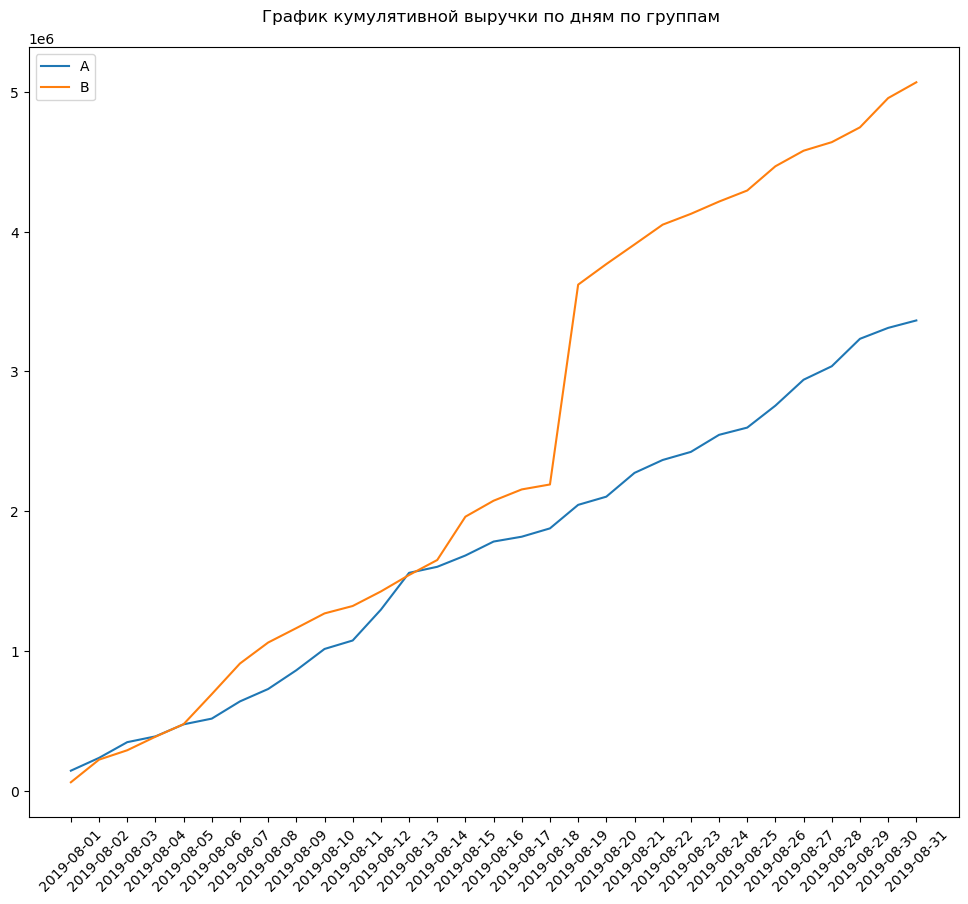

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.legend()

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

#Добавляем заголовок
plt.title('График кумулятивной выручки по дням по группам \n')

#Делаем подписи на оси x читаемыми
plt.xticks(rotation= 45);

Рост выручки у группы B скачкообразный. 19 августа мы наблюдаем резкий рост. Похоже на аномалию. Посмотрим на выручку в группе B, отсортируем значения по убыванию.

In [30]:
cumulativeRevenueB.sort_values(by='revenue', ascending=False)

,date,revenue,orders
61,2019-08-31,5068972,528
59,2019-08-30,4955833,511
57,2019-08-29,4746610,490
55,2019-08-28,4640510,476
53,2019-08-27,4579312,456
51,2019-08-26,4467965,446
49,2019-08-25,4294526,424
47,2019-08-24,4215269,412
45,2019-08-23,4127403,400
43,2019-08-22,4050134,388


In [31]:
("Прибыль 19 августа увеличилась на {:.1%}".
format((cumulativeRevenueB['revenue'][37] - cumulativeRevenueB['revenue'][35])/cumulativeRevenueB['revenue'][35]))

'Прибыль 19 августа увеличилась на 65.3%'

При этом число заказов так резко не увеличилось. Видимо, это были какие-то аномально крупные заказы. Более детально мы рассмотрим выбросы позже.

### Вывод

* Только первые несколько дней выручка у обеих групп была стабильно одинаковой, с 5 мая пользователи группы B вырываются вперед  и показывают более высокую выручку.

* Рост выручки у группы B при этом скачкообразный. 19 августа прибыль увеличилась аж на 65%. Это были аномально крупные дорогие заказы. Аномально большие заказы влияют на результаты. На этапе заключительного анализа результатов AB-теста их нужно будет удалить.

## График кумулятивного среднего чека по группам. 

Построим график кумулятивного среднего чека по дням по группам.

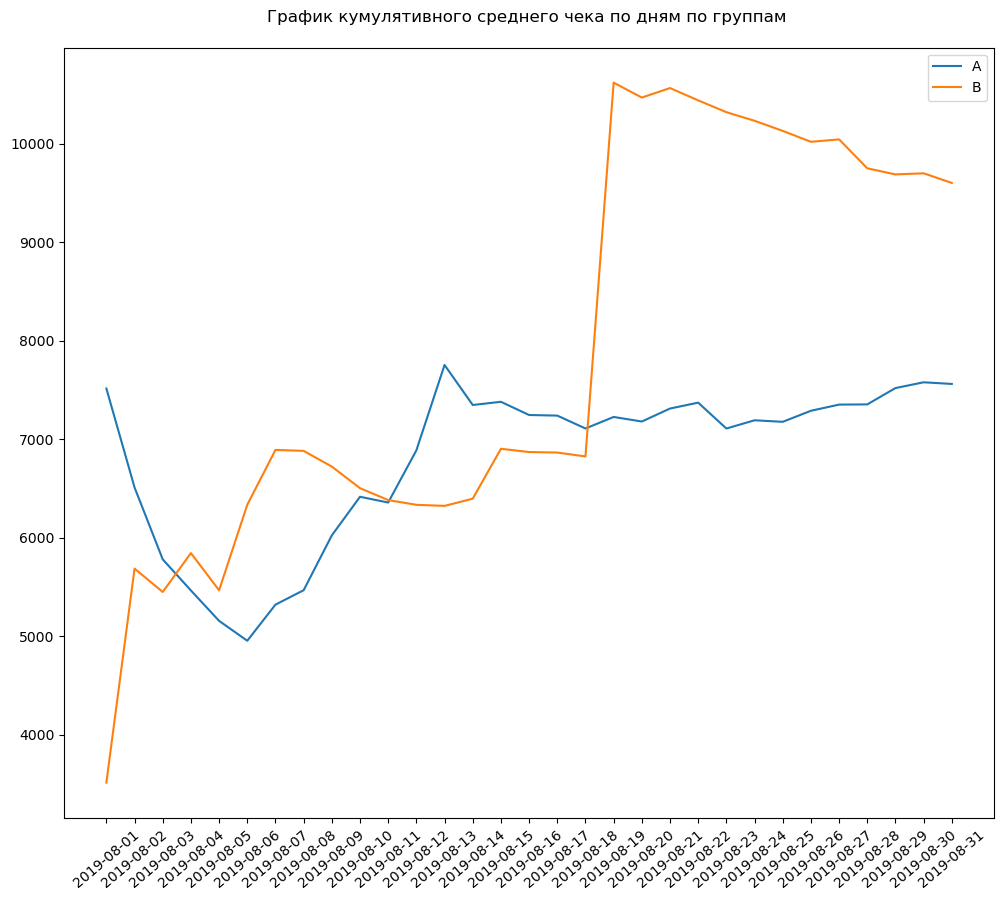

In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(12,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

#Добавляем заголовок
plt.title('График кумулятивного среднего чека по дням по группам \n')

#Делаем подписи на оси x читаемыми
plt.xticks(rotation= 40);

### Вывод

* Кумулятивное значение среднего чека по группам также колеблется. 

* Принимать решение по этой метрике рано.

## График относительного изменения кумулятивного среднего чека группы B к группе A.

Чтобы нагляднее увидеть разницу между группами, построим график относительного различия кумулятивного среднего чека группы B к группе A.

Каждую его точку рассчитывают так: **кумулятивная метрика группы B / кумулятивная метрика группы A - 1**.

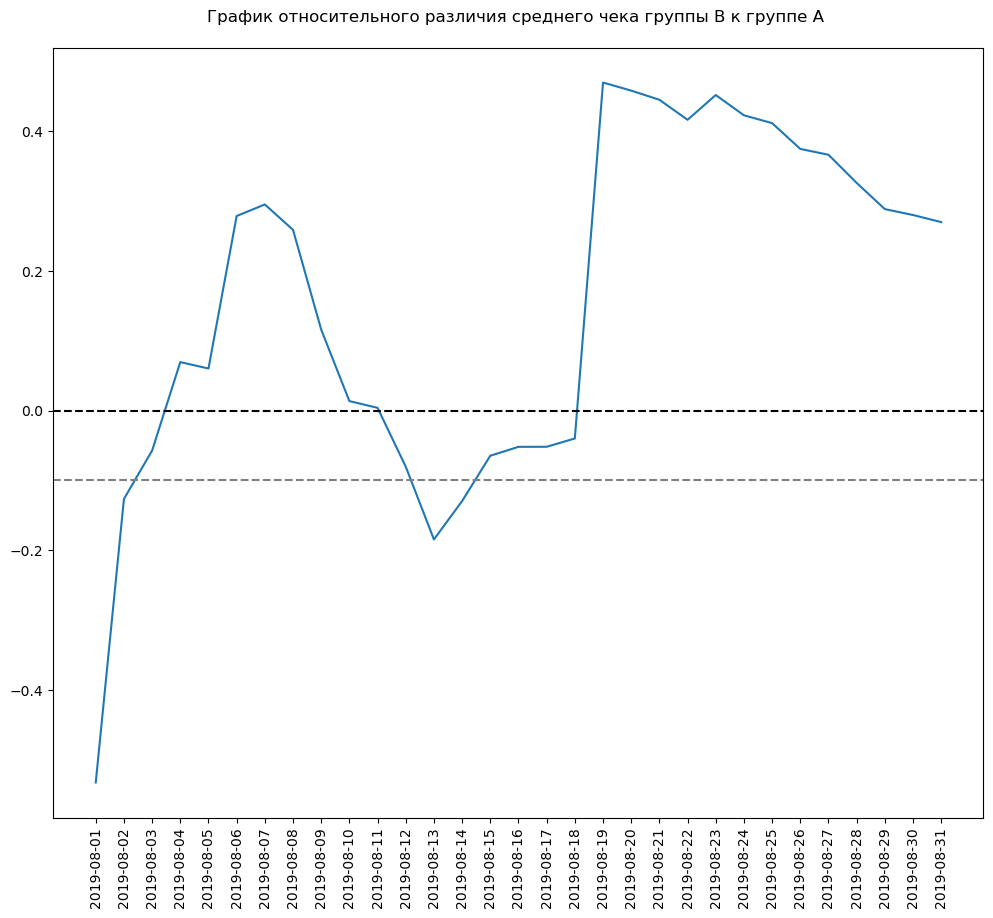

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,10))
(plt.plot(mergedCumulativeRevenue['date'], 
          (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
          /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1))

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

#Добавляем заголовок
plt.title('График относительного различия среднего чека группы B к группе A \n')

#Делаем подписи на оси x читаемыми
plt.xticks(rotation= 90);

### Вывод

* В начале теста средний чек в группе B был значительно ниже, чем у группы A.

* В нескольких точках график различия между группами резко «скачет». Там спрятались крупные заказы и выбросы. 

## График кумулятивной конверсии по группам

Для этого сначла посчитаем кумулятивную конверсию.

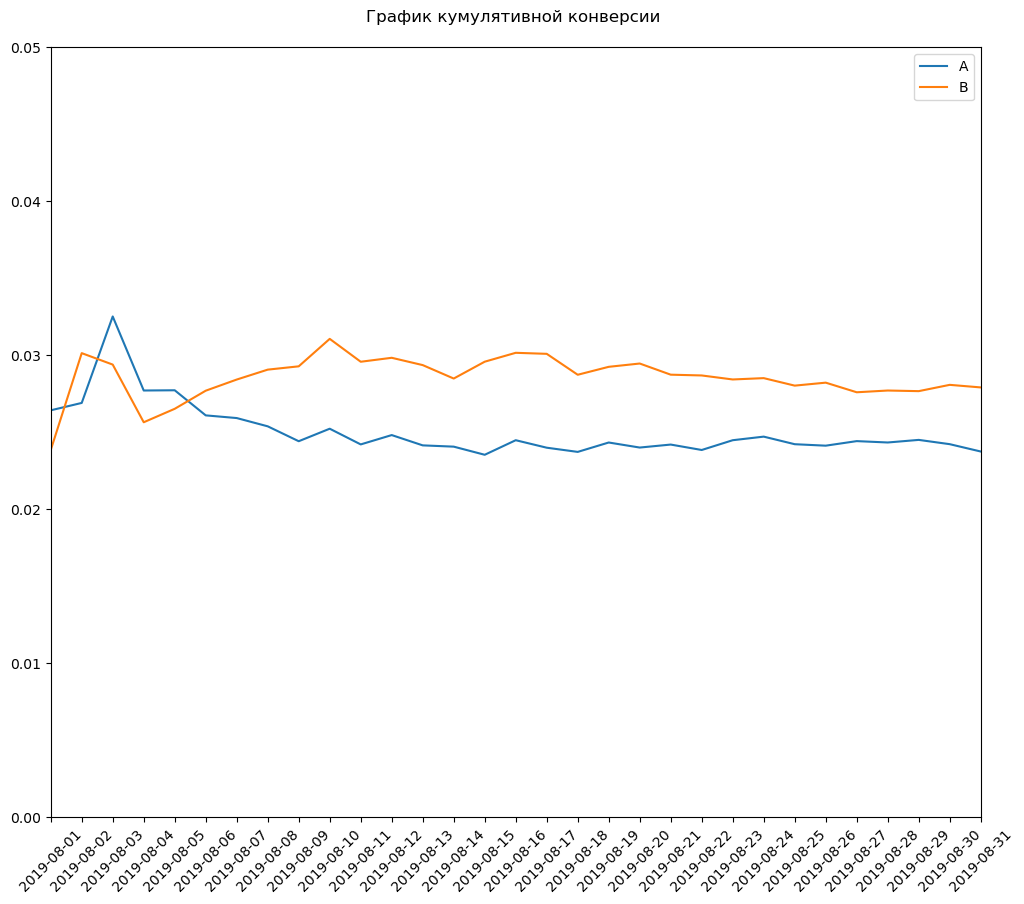

In [34]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей 
#передаем plt.axis минимальное и максимальное значения оси x:
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

#Добавляем заголовок
plt.title('График кумулятивной конверсии \n')

#Делаем подписи на оси x читаемыми
plt.xticks(rotation= 45);

### Вывод

Конверсии у обоих групп в самом начале росли, причем у группы A она была выше. 
После 3 августа конверсии упали. После 5 августа конверсия у группы B стабильно выше, чем у группы A. 

## График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий.

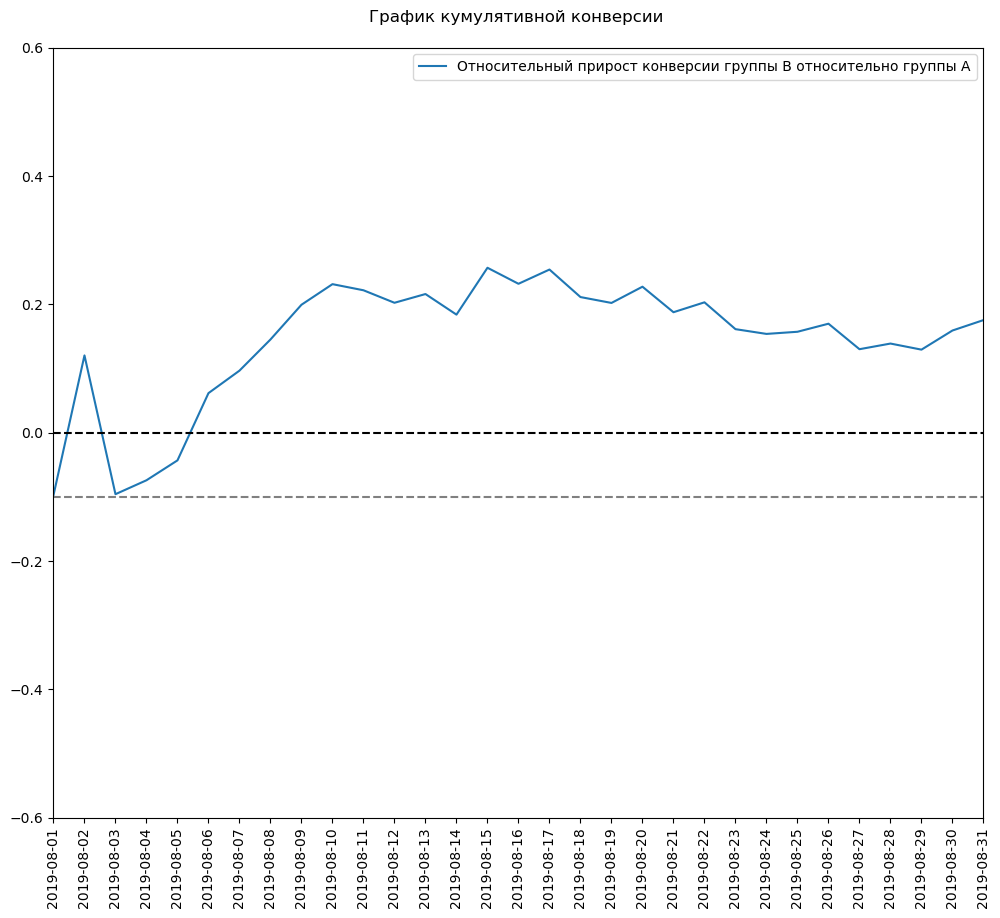

In [35]:
mergedCumCnvs = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,10))
plt.plot(mergedCumCnvs['date'], mergedCumCnvs['conversionB']/mergedCumCnvs['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

# задаем масштаб осей 
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])

#Добавляем заголовок
plt.title('График кумулятивной конверсии \n')

#Делаем подписи на оси x читаемыми
plt.xticks(rotation= 90);

### Вывод

Разница в кумулятивной конверсии группы B резко колебалась в начале, а потом стала стабильно выше, чем у группы A. 

Наблюдается стабилизация результатов. Но пока рано делать какие-либо окончательные выводы. Нужно сначала тщательно проанализировать выбросы. 


## Точечный график количества заказов по посетителям

Для начала соберем нужные данные для диаграммы: 
сгруппируем данные по идентификатору посетителя и посчитаем количество транзакций на каждого посетителя.

In [36]:
ordersByVisitors = (
    orders_new.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByVisitors.columns = ['visitorId', 'orders']

#Посмотрим на распределение числа заказов с помощью value_counts()
ordersByVisitors['orders'].value_counts()

1    937
2     29
3      7
Name: orders, dtype: int64

Посмотрим также на описательную статистику сгруппированных данных.

In [37]:
ordersByVisitors.describe()

,visitorId,orders
count,9.730000e+02,973.000000
mean,2.118387e+09,1.044193
std,1.221446e+09,0.238090
min,5.114589e+06,1.000000
25%,1.028756e+09,1.000000
50%,2.138109e+09,1.000000
75%,3.141508e+09,1.000000
max,4.283872e+09,3.000000


Построим диаграмму рассеивания количества заказов по посетителям магазина.

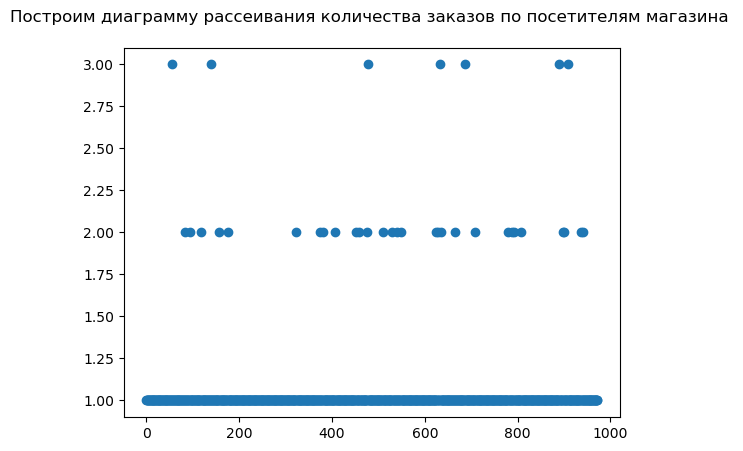

In [38]:
x_values = pd.Series(range(0,len(ordersByVisitors)))
plt.scatter(x_values, ordersByVisitors['orders'])
plt.title('Построим диаграмму рассеивания количества заказов по посетителям магазина \n');

### Вывод

* Чаще всего посетитель совершал 1 заказ - 75 % случаев, 
* далее чаще встречаются посетители с 2 заказами и     
* лишь 7 посетителей совершили 3 заказа. Таких посетителей можно будет считать выбросами в данных.

## 95-й и 99-й перцентили количества заказов на посетителя


Посчитаем выборочные перцентили количества заказов на одного пользователя c помощью метод percentile() библиотеки Numpy. 

In [39]:
print(np.percentile(ordersByVisitors['orders'], [95, 99]))

[1. 2.]


### Вывод

* Не более 5 процентов пользователей оформляли более 1 заказа. 
* Определим 2 как границу аномальных посетителей. Исключим из анализа посетителей, которые совершили больше 2 заказов.     

## Точечный график стоимостей заказов

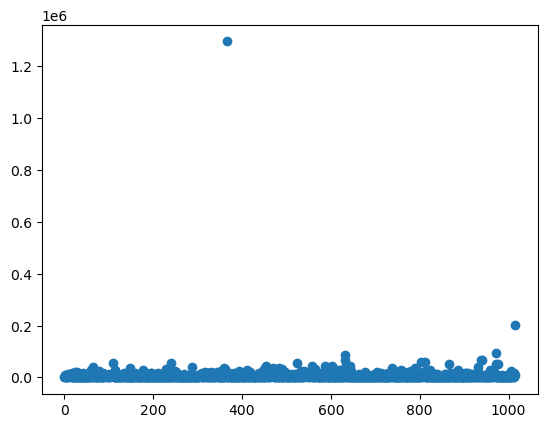

In [40]:
x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue']);

In [41]:
orders_new['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

### Вывод

* На графике видны выбросы на отметке в 200 000 рублей  и более 1 200 000. 
* Посмотрим подробнее на перцентилях. 

## 95-й и 99-й перцентили стоимости заказов

In [42]:
print(np.percentile(orders_new['revenue'], [95, 99]))

[26785. 53904.]


### Вывод

* Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. 
* Возьмем за границу определения аномальных по стоимости заказов сумму в 53904 рублей. Так мы отрежем не более 1 процента данных.

## Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами А и B по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 

- H0 - различий в конверсии между группами A и B нет.
- H1 - различия в конверсии между группами A и B есть.

Подготовим данные для проверки статистической значимости.

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders_new[orders_new['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersBDaily = (
    orders_new[orders_new['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


data = (
    ordersADaily.merge(
        ordersBDaily, on='date', how='left'
    )
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily, on='date', how='left')
   
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,23,142779,17,59758,719,713
1,2019-08-02,19,91602,23,162043,619,581
2,2019-08-03,24,112473,14,67049,507,509
3,2019-08-04,11,41176,14,96890,717,770
4,2019-08-05,22,86383,21,89908,756,707


Названия столбцов данных:

* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* visitorsPerDateA — количество посетителей в выбранную дату в группе A;
* visitorsPerDateB — количество посетителей в выбранную дату в группе B;

Создадим переменные ordersVisitorsA и ordersByVisitorsB со столбцами ['visitorId', 'orders']. 

В них для посетителей, которые совершали покупку, укажем число совершённых заказов.

In [44]:
ordersByVisitorsA = (
    orders_new[orders_new['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByVisitorsA.columns = ['visitorId', 'orders']

ordersByVisitorsB = (
    orders_new[orders_new['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByVisitorsB.columns = ['visitorId', 'orders']

In [45]:
ordersByVisitorsA.head()

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


Объявим переменные sampleA и sampleB, в которых посетителям из разных групп будет соответствовать количество заказов. 
Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная sampleA должна состоять из двух частей: 

* Список с количеством заказов для каждого из посетителей: ordersVisitorsA['orders'].

* Нули для посетителей, которые ничего не заказывали. 

Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersVisitorsA['orders']). То же самое и для посетителей группы B.


In [46]:
sampleA = pd.concat([ordersByVisitorsA['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByVisitorsA['orders']))
                               , name='orders')],axis=0)

sampleB = pd.concat([ordersByVisitorsB['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByVisitorsB['orders']))
                               , name='orders')],axis=0)

<a id='len'></a>

Проверим, что у нас получилось.

In [47]:
print('Длина списка:', len(sampleA))
print(sampleA[0:5])

Длина списка: 18736
0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64


In [48]:
print('Длина списка:', len(sampleB))
print(sampleB[0:5])

Длина списка: 18916
0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64


Применим критерий Шапиро-Уилка, чтобы проверить, нормально ли распределены наши данные. 

Определим функцию для проведения теста Шапиро-Уилка.

In [49]:
"""Функция для проведения теста Шапиро-Уилка
Критический уровень статистической значимости по умолчанию равен 0.05."""

def shapiro_test (sample, alpha = 0.05): 
    results = stats.shapiro(sample)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

In [50]:
shapiro_test(sampleA)

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [51]:
shapiro_test(sampleB)

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Поскольку наши данные распределены не нормально и небольшие по размеру, для определения статистической значимости мы применим критерий Манна-Уитни.

Определим функцию для проведения теста Манна-Уитни.

In [52]:
"""Функция для проведения теста Манна-Уитни
Критический уровень статистической значимости по умолчанию равен 0.05."""

def mannwhitneyu_test(sample1, sample2, alpha = 0.05):   
    results = stats.mannwhitneyu(sample1, sample2)
    print("P-value:{0:.3f}".format(results[1]))
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

Вспомним, что такое у нас sampleA и sampleB. 
Это объекты series, в которых каждый элемент — число заказов определённого пользователя, в том числе ноль.
Число элементов (index) — это количество пользователей, сумма всех элементов (value) — это количество заказов. 
Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA и sampleB методом mean().

In [53]:
mannwhitneyu_test(sampleA, sampleB)

P-value:0.011
Отвергаем нулевую гипотезу: разница статистически значима.


In [54]:
"Относительный прирост конверсии группы B по отношению к группе A: {0:.1%}".format(sampleB.mean() / sampleA.mean() - 1)

'Относительный прирост конверсии группы B по отношению к группе A: 16.0%'

### Вывод

* По «сырым» данным, в конверсии групп A и B есть различия.
* Относительный прирост конверсии группы B по отношению к группе A составляет 16%.
* Но это пока предварительные выводы. Нужно исключить аномалии.


## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между группами A и B. 

* Нулевая гипотеза: различий в среднем чеке между группами нет. 

* Альтернативная гипотеза: различия в среднем чеке между группами есть.


Для начала сделаем две выборки с выручкой для посетителей группы A и B.

In [55]:
sample_revA = orders_new[orders_new['group']=='A']['revenue']
sample_revB = orders_new[orders_new['group']=='B']['revenue']

In [56]:
sample_revA.head()

7      1044
8     13710
10     4008
12     7370
14    10980
Name: revenue, dtype: int64

Проверим рапсределение в наших выборках.

In [57]:
shapiro_test(sample_revA)

p-значение:  2.8240222045454137e-31
Отвергаем нулевую гипотезу: распределение не нормально


In [58]:
shapiro_test(sample_revB)

p-значение:  4.203895392974451e-45
Отвергаем нулевую гипотезу: распределение не нормально


Поскольку распределение не является нормальным и выборки небольшие по размеру, применим тест Манна-Уитни.

In [59]:
mannwhitneyu_test(sample_revA, sample_revB)

P-value:0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.


И посмотрим на относительные различия в среднем чеке между группами.

In [60]:
"Относительные различия в среднем чеке: {0:.1%}".format(sample_revB.mean() / sample_revA.mean() - 1)

'Относительные различия в среднем чеке: 28.7%'

### Вывод

* По «сырым» данным, средние чеки группы A и группы B не отличаются.
* Наблюдаемое различие в среднем чеке между группами в 28.7% не является статистически значимым.
* Нужно исключить аномалии.

## Статистическая значимость различий в конверсии между группами по «очищенным» данным

Исключим аномалии из данных и еще раз проведем тест Манна-Уитни. 

Сделаем срезы аномальных пользователей, используя 99-й перцентили. Объединим их в таблице abnormalUsers.

In [61]:
revenue_lim = np.percentile(orders_new['revenue'], 99)
orders_lim = np.percentile(ordersByVisitors['orders'], 99)
print(revenue_lim)
print(orders_lim)

53904.0
2.0


In [62]:
usersWithManyOrders = pd.concat(
    [
        ordersByVisitorsA[ordersByVisitorsA['orders'] > 2]['visitorId'],
        ordersByVisitorsB[ordersByVisitorsB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 53000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('\nКоличество аномальных посетителей:', abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64

Количество аномальных посетителей: 19


Проверим, сколько данных мы отрежем, если исключим из анализа 19 аномальных посетителя.

In [63]:
'Мы отрезали {:.1%} данных'.format(1 - orders_new.query('visitorId not in @abnormalUsers').shape[0] / orders_new.shape[0]) 

'Мы отрезали 3.2% данных'

3% - это немного и допустимо. 

Подготовим выборки количества заказов по пользователям по группам теста.

In [64]:
sampleAFltd = pd.concat(
    [
        ordersByVisitorsA[
            np.logical_not(ordersByVisitorsA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByVisitorsA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFltd = pd.concat(
    [
        ordersByVisitorsB[
            np.logical_not(ordersByVisitorsB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByVisitorsB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим наши выборки.

In [65]:
print('Длина списка:', len(sampleAFltd))
print(sampleAFltd[0:5])

Длина списка: 18724
0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64


In [66]:
print('Длина списка:', len(sampleBFltd))
print(sampleBFltd[0:5])

Длина списка: 18909
0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64


In [67]:
len(sampleA) - len(sampleAFltd)

12

In [68]:
len(sampleB) - len(sampleBFltd)

7

Да, длина выборки, свободной от аномалий, меньше на тех самых 19 посетителей. Все хорошо. Мы можем продолжать анализ.

Считаем статистическую значимость различий в конверсии между группами по данным, свободным от аномалий.

In [69]:
mannwhitneyu_test(sampleAFltd, sampleBFltd)

P-value:0.006
Отвергаем нулевую гипотезу: разница статистически значима.


In [70]:
"Относительный прирост конверсии группы B по отношению к группе A: {0:.1%}".format(sampleBFltd.mean() / sampleAFltd.mean() - 1)

'Относительный прирост конверсии группы B по отношению к группе A: 19.2%'

### Вывод

* Анализ «очищенных» данных показывает, что конверсии групп A и B отличаются.
* При этом относительный прирост конверсии группы B по отношению к группе A даже выше для очищенных данных - 19%.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Теперь проверим, отличается ли у нас средний чек в группах по очищенным данным.

Создадим выборки с доходом, свободные от аномальных посетителей.

In [71]:
sample_revA_flt = orders_new.query('visitorId not in @abnormalUsers and group == "A"')['revenue']
sample_revB_flt = orders_new.query('visitorId not in @abnormalUsers and group == "B"')['revenue']

Проводим тест Манна-Уитни.

In [72]:
mannwhitneyu_test(sample_revA_flt, sample_revB_flt)

P-value:0.842
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.


In [73]:
"Относительные различия в среднем чеке: {0:.1%}".format(sample_revB_flt.mean() / sample_revA_flt.mean() - 1)

'Относительные различия в среднем чеке: -1.4%'

### Вывод

* Анализ очищенных данных показал также, что средние чеки группы A и группы B НЕ отличаются.
* Наблюдаемое различие в средних чеках в 1.4% не является статистически значимым.

<a name='stage_4'></a>
# Шаг 4. Общий вывод
[Назад к оглавлению](#contents)    

Анализ сырых и очищенных данных показал, что:

* Конверсии групп A и B отличаются и это различие не случайно, оно подтверждено тестом Манна-Уитни. 
Конверсия в группе B по очищенным данным на 19% выше. 

* Средний чек групп A и B не различается, и это подтверждено тестом Манна-Уитни. 
По очищенным данным средний чек группы B ниже, чем у группы A на 1.4%. 

* A/B тестирование можно остановить и признать отсутствие различий среднего чека у двух групп. Новая идея никак не влияет на средний чек, хотя значительно увеличивает (на 19%) конверсию пользователей. 

# Спасибо, что проверили мой проект.